# <center>Сравнение методов классификации</center>
Винник Екатерина Петровна, 22.М04
## Задача

- [+] Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.
- [+] Взять данные для предсказания заболеваний сердца [тут](https://github.com/rustam-azimov/ml-course/tree/main/data/heart_disease) (целевой признак для предсказания --- **target**). Демо блакнот с анализом этих данных можно найти [тут](https://github.com/rustam-azimov/ml-course/blob/main/practice/practice07_knn_nb/practice07_part02_classification_heart_disease_demo.ipynb).
- [+] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
- [+] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
- [+] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [+] Используя **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
- [+] Повторить предыдущий пункт для библиотечных реализаций (например, из **sklearn**) всех пройденных методов классификации (**logistic regression, svm, knn, naive bayes, decision tree**).
- [ ] Сравнить все обученные модели, построить их **confusion matrices**. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.
- [+] (**+2 балла**) Реализовать еще один из методов классификации и добавить его в сравнение.
- [ ] (**+2 балла**) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

## Чтение данных

In [2]:
df = pd.read_csv('./heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Возьмём данные заболеваний сердца у пациентов, которые можно скачать [тут](https://www.kaggle.com/code/ahmedadell30/heart-disease-prediction-with-ann-models/data).

Описание датасета: <br>

* age - age in years <br>
* sex - (1 = male; 0 = female) <br>
* cp - chest pain type <br>
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br>
* chol - serum cholestoral in mg/dl <br>
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
* restecg - resting electrocardiographic results <br>
* thalach - maximum heart rate achieved <br>
* exang - exercise induced angina (1 = yes; 0 = no) <br>
* oldpeak - ST depression induced by exercise relative to rest <br>
* slope - the slope of the peak exercise ST segment <br>
* ca - number of major vessels (0-3) colored by flourosopy <br>
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
* target - have disease or not (1=yes, 0=no)

Необходимо решить задачу классификации и научиться предсказывать целовой признак **target** имеет ли пациент заболевание сердца.

## EDA

In [3]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

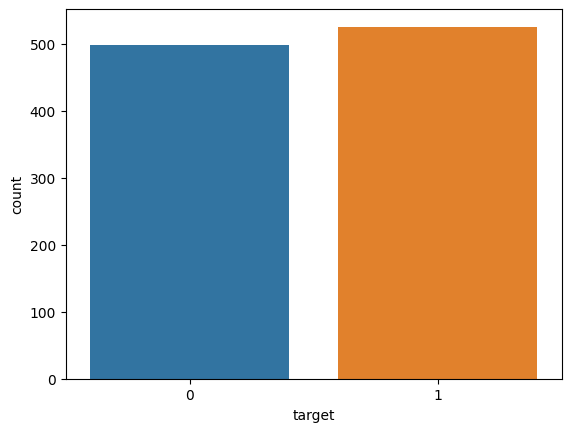

In [4]:
sns.countplot(x="target", data=df)
plt.show()

Количества людей без заболевания сердца и с заболеванием сердца не слишком различаются, но людей с заболеванием сердца немного больше.

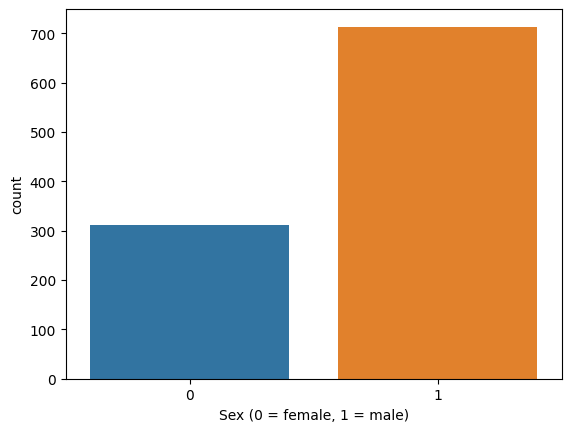

In [5]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

Из графика видно, что в рассматриваемых данных более чем в два раза больше мужчин, чем женщин. 

Рассмотрим категориальный признак cp -- типы боли в груди.

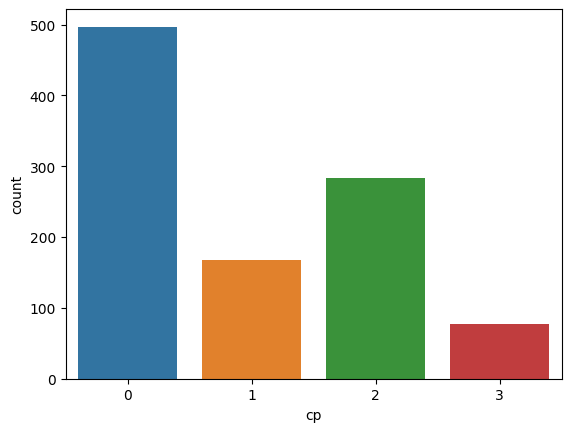

In [6]:
sns.countplot(x="cp", data=df)
plt.show()

Из графика следует, что есть 4 типа боли в груди. Наиболее распространенный тип -- тип 0, наименее распространенный -- тип 0.

Рассмотрим признак exang, характеризующий наличие у человека стенокардии.

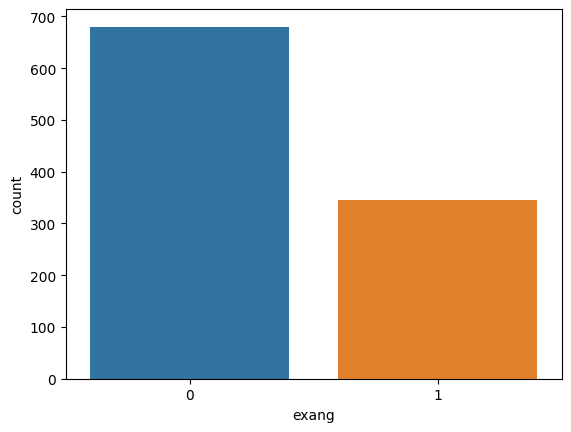

In [7]:
sns.countplot(x="exang", data=df)
plt.show()

Из графика видно, что в датасете преобладает количество людей без стенокардии -- их почти в два раза больше.

Рассмотрим категориальный признак Slope -- значение наклона пикового сегмента ST при нагрузке.

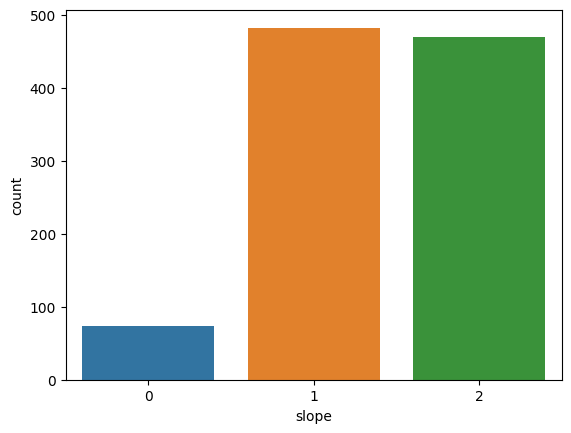

In [8]:
sns.countplot(x="slope", data=df)
plt.show()

Видим, что в датасете совсем немного людей со значением наклона пикового сегмента 0, и примерно одинаковое количество людей со значением наклона пикового сегмента 1 и 2.

Рассмотрим категориальный признак ca, характеризующий количество крупных сосудов у человека.

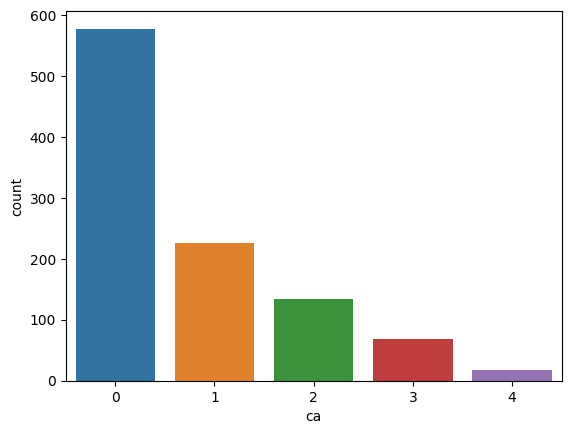

In [9]:
sns.countplot(x="ca", data=df)
plt.show()

Преобладает количество людей, не имеющих крупных сосудов (количество крупных сосудов 0). Количество человек, имеющих определенное количество крупных сосудов, обратно пропорционально количеству сосудов (чем больше крупных сосудов у человека, тем менее вероятно встретить его в датасете).

### Двумерный анализ признаков

#### Age vs Target

Построим график зависимости частоты заболеваний сердца от возраста.

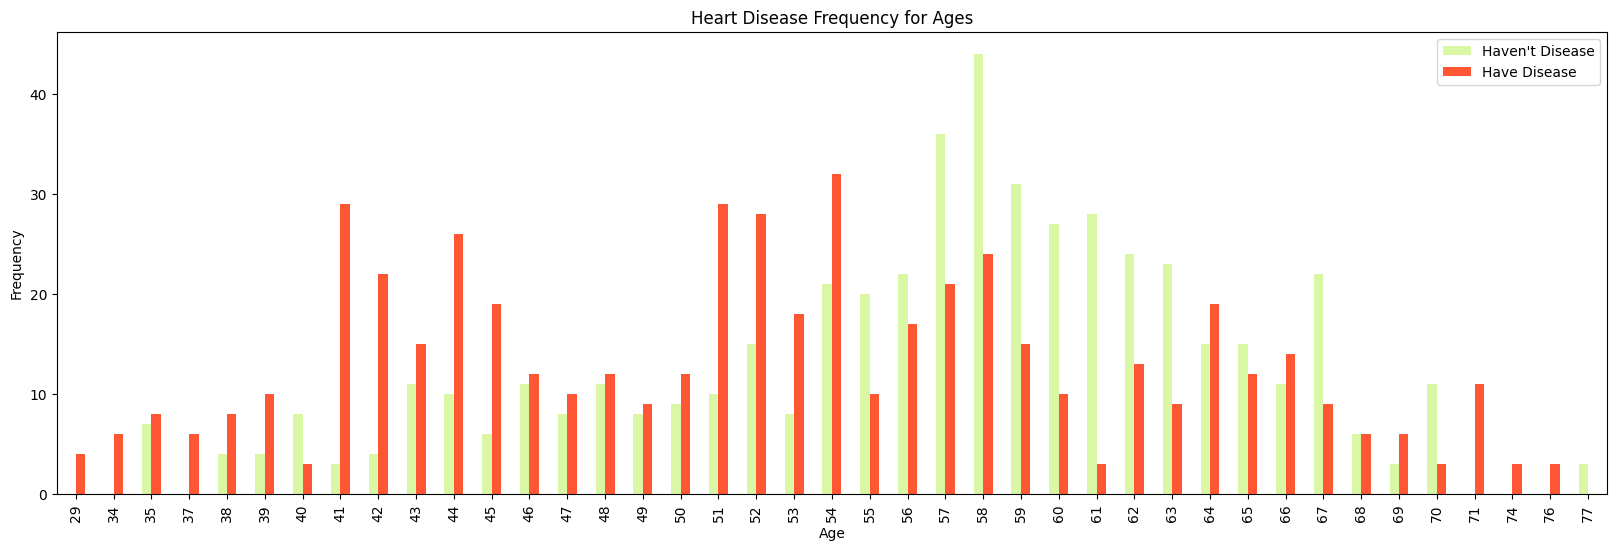

In [10]:
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(20, 6), color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

Из графика видно, что среди людей моложе 55 лет преобладают люди с сердечными заболеванияями (кроме людей, имеющих возраст 40 лет), тогда как среди людей старше 55 лет преобладают люди без сердечных заболеваний. 

#### Sex vs Target
Проанализируем зависимость наличия болезней сердца от пола.

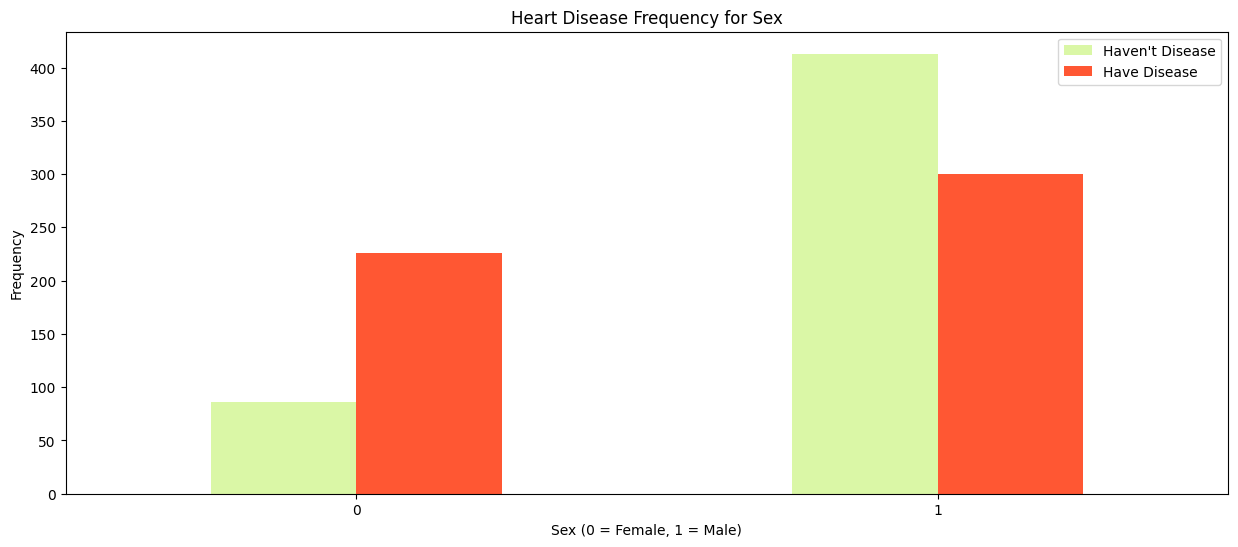

In [11]:
pd.crosstab(df.sex,df.target).plot(kind="bar", figsize=(15, 6), color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Заболевания сердца чаще есть у мужчин, чем у женщин. Однако, хотя количество женщин с заболеванием сердца 
меньше количества мужчин с заболеванием сердца, среди женщин преобладают женщины с сердечными заболеваниями. Среди мужчин наоборот больше мужчин без болезней сердца.

#### Slope vs Target

Построим график наличия сердечных заболеваний относительно типа пикового сегмента ST:

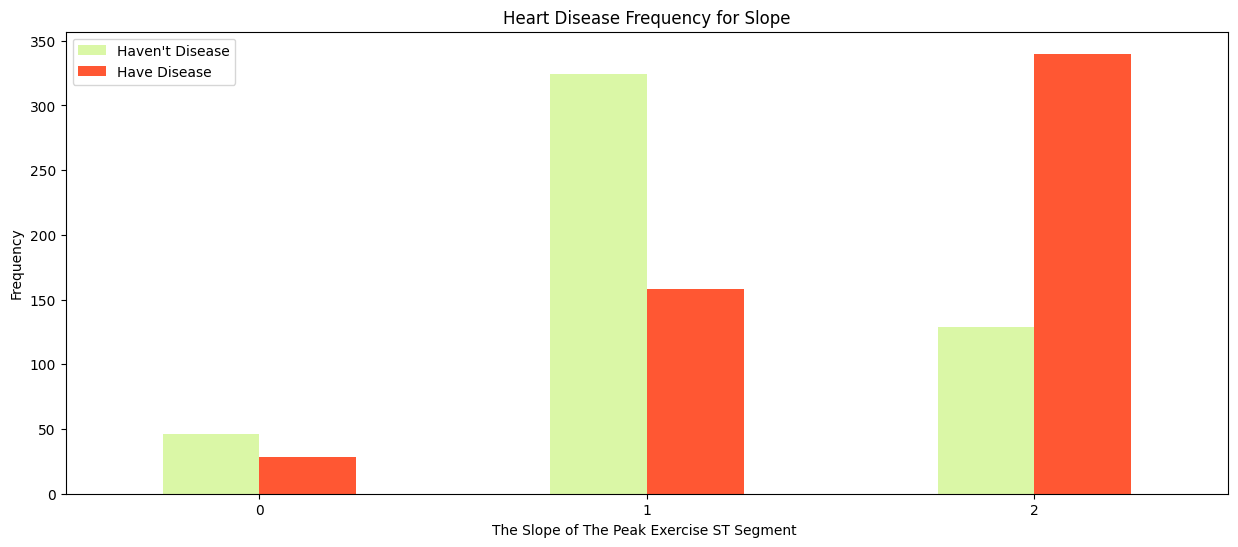

In [12]:
pd.crosstab(df.slope,df.target).plot(kind="bar", figsize=(15, 6), color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

Видим, что у людей с типом пикового сегмента ST 0 и 1 преобладает число людей без сердечных заболеваний. 
У людей с типом пикового сегмента ST 2 преобладает число пациентов, обладающих сердечными заболеваниями.

#### FBS vs Target
Посмотрим, влияет ли уровень сахара в крови на наличие сердечных заболеваний.

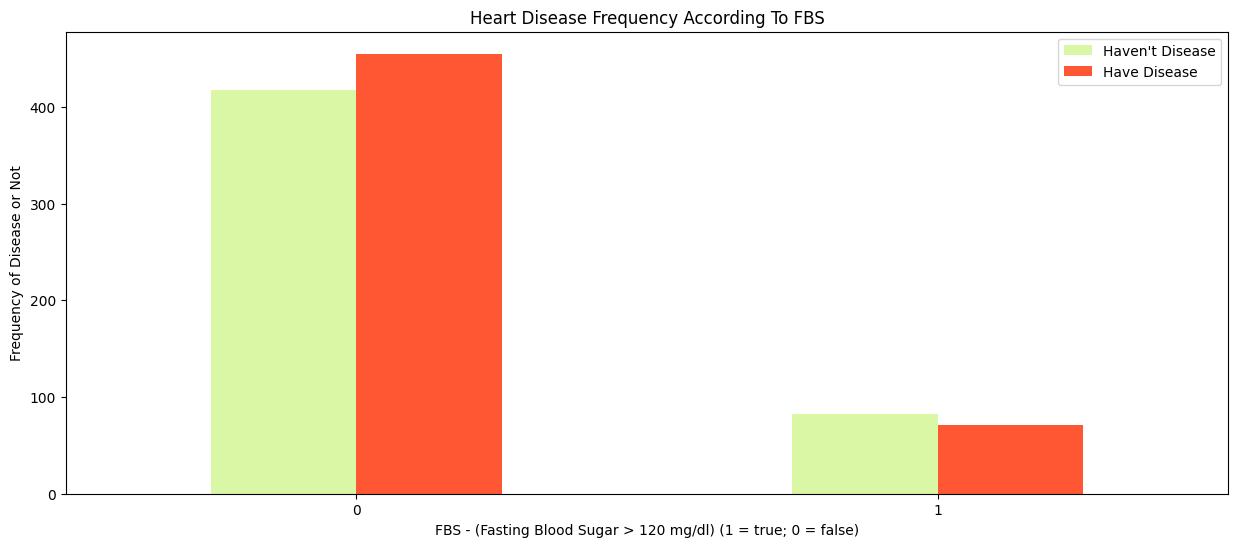

In [13]:
pd.crosstab(df.fbs,df.target).plot(kind="bar", figsize=(15, 6), color=['#DAF7A6','#FF5733'])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

Кажется, что уровень сахара в крови не слишком сильно влияет на наличие сердечных заболеваний -- количество людей с сердечными заболеваниями и без примерно одинаковое в обоих случаях (и при уровне сахара, не превосходящем 120 mg/dl и при уровне сахара выше 120 mg/dl).

#### CP vs Target
Построим график наличия сердечных заболеваний относительно типа боли в груди:

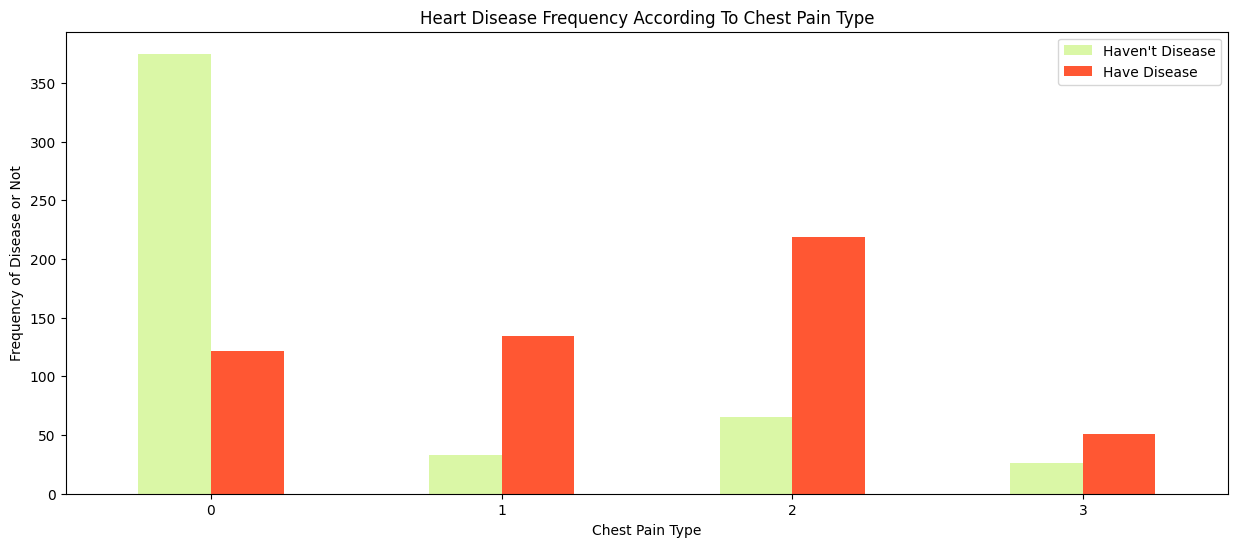

In [14]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15, 6), color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

Видим, что большинство людей с типами боли 1, 2, 3 в груди имеют сердечные заболевания. Особенно преобладают люди с сердечными заболеваниями в категории людей, имеющих тип боли в груди 2. Количество людей без сердечных заболеваний с типом боли в груди 0 приблизительно в три раза больше, чем количество людей с типом боли в груди 0, имеющих сердечные заболевания.

#### ca vs Target

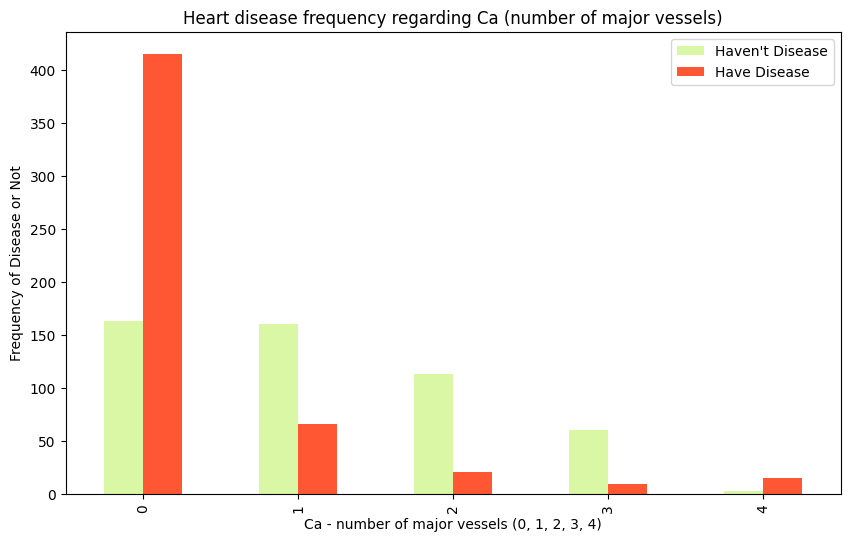

In [15]:
pd.crosstab(df.ca, df.target).plot(kind="bar", figsize=(10, 6), color=['#DAF7A6','#FF5733'])
plt.title('Heart disease frequency regarding Ca (number of major vessels)')
plt.xlabel('Ca - number of major vessels (0, 1, 2, 3, 4)')
plt.ylabel('Frequency of Disease or Not')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

Из графика видно, что среди людей с количеством крупных сосудов от 0 до 4, больше всего людей имеют сердечные заболевания при отсутствии крупных сосудов. Но так как большинство людей датасета не имеют крупных сосудов (анализировали ранее), нельзя утверждать, что отсутствие крупных сосудов влияет на наличие сердечных заболеваний. 
Среди людей с количеством крупных сосудов от 1 до 3 преобладают люди без сердечных заболеваний. Среди людей с четырьмя крупными сосудами преобладают люди с сердечными заболеваниями.

### Преобразование категориальных признаков

Закодируем категориальные признаки **cp**, **thal** и **slope**.

In [16]:
cp_dum = pd.get_dummies(df['cp'], prefix = "cp")
thal_dum = pd.get_dummies(df['thal'], prefix = "thal")
slope_dum = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, cp_dum, thal_dum, slope_dum]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [17]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


## Разбиение данных с использованием train_test_split и масштабирование

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['target']
X = df.drop(columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std


accuracies = {}

def get_best_accuracy_from_estimators(dictionary, X, y):
    estimators = dictionary['estimator']
    max_accuracy = 0.
    for estimator in estimators:
        y_pred = estimator.predict(X)
        accuracy = accuracy_score(y, y_pred)
        if accuracy > max_accuracy:
            max_accuracy = accuracy
    return max_accuracy        

def classification_using_cross_val(model):    
    # repeated k fold validation with tuned hyperparameters
    lr_accuracies = []
    max_accuracy = 0.
    number_of_folds = 0
    ks = range(3,15)
    for i in ks:
        cv = RepeatedKFold(n_splits=i, n_repeats=3, random_state=1)
        dictionary = cross_validate(model, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1, return_estimator=True)
        accuracy = get_best_accuracy_from_estimators(dictionary, X_test_scaled, y_test)
        if (accuracy > max_accuracy):
            max_accuracy = accuracy
            number_of_folds = i
        lr_accuracies.append(accuracy)    
    print('Test accuracy achieved with repeated %d -Fold Cross-Validation: %.3f' % (number_of_folds, max_accuracy))
    plt.plot(ks,lr_accuracies)
    return (max_accuracy, number_of_folds)

def simple_classification(lr):
    lr.fit(X_train_scaled, y_train)
    y_pred = lr.predict(X_test_scaled)
    acc = accuracy_score(y_pred, y_test)
    print("Test Accuracy without repeated k-Fold Cross-Validation {:.4f}".format(acc))

Test Accuracy without repeated k-Fold Cross-Validation 0.8084
Test accuracy achieved with repeated 6 -Fold Cross-Validation: 0.828
Best C =  1.0
Best penalty =  l2
Test accuracy achieved with repeated 6 -Fold Cross-Validation: 0.828
Test accuracy achieved with repeated 6 -Fold Cross-Validation && tuned hyperparams: 0.828


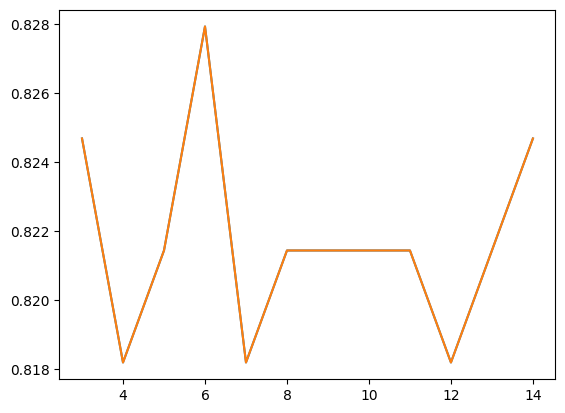

In [20]:
def logistic_regression_using_cross_val_and_tuning_hp():
    # tuning hyperparameters
    grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2","elasticnet","none"]}
    searcher=GridSearchCV(LogisticRegression(random_state=42), grid, scoring='accuracy', cv=10)
    searcher.fit(X_train_scaled,y_train)
    # creating model
    best_C = searcher.best_params_["C"]
    best_penalty = searcher.best_params_["penalty"]
    print("Best C = ", best_C)
    print("Best penalty = ", best_penalty)
    model = LogisticRegression(C=best_C, penalty=best_penalty)
    #calculating accuracy
    (accuracy, number_of_folds) = classification_using_cross_val(model)
    print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))
    return accuracy
   
model = LogisticRegression()    
simple_classification(model)
(_, number_of_folds) = classification_using_cross_val(model)
acc = logistic_regression_using_cross_val_and_tuning_hp()
accuracies['Logistic Regression'] = acc


Кросс-валидация улучшила точность классификатора. 
Количество фолдов варьировалось с 2 до 20, на 6 фолдах достигается максимальная точность. 
Увеличение количества повторов кросс-валидации не дало улучшения (проверялось вручную). 
Тюнинг параметров C и penalty не произвел дополнительных улучшений. 

### Реализованная лог регр

In [21]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator

class MyLogisticRegression(BaseEstimator):
    def __init__(self, learning_rate=0.1, max_iter=1000, regularization='l2', C = 1, tolerance = 0.0001, _estimator_type='classifier'):
        self.learning_rate  = learning_rate
        self.max_iter       = max_iter
        self.regularization = regularization
        self.C              = C
        self.tolerance      = tolerance
        self._estimator_type = _estimator_type
    
    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1] + 1)
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

        for _ in range(self.max_iter):  
            errors = (self.__sigmoid(X @ self.theta)) - y
            N = X.shape[1]

            if self.regularization is not None:
                delta_grad = self.learning_rate * ((self.C * (X.T @ errors)) + np.sum(self.theta))
            else:
                delta_grad = self.learning_rate * (X.T @ errors)

            if np.all(abs(delta_grad) >= self.tolerance):
                self.theta = self.theta - delta_grad / N
            else:
                break               
        return self
    def predict_proba(self, X):
        return self.__sigmoid((X @ self.theta[1:]) + self.theta[0])    
    
    def predict(self, X):
        return np.round(self.predict_proba(X))
        
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def set_params(self, learning_rate=0.1, max_iter=1000, regularization='l2', C = 1, tolerance = 0.0001, _estimator_type='classifier'):
        self.learning_rate  = learning_rate
        self.max_iter       = max_iter
        self.regularization = regularization
        self.C              = C
        self.tolerance      = tolerance
        self._estimator_type = _estimator_type
        return self

    def get_params(self, deep=False):
            params = dict()
            params['learning_rate'] = self.learning_rate
            params['C'] = self.C
            params['max_iter'] = self.max_iter
            params['regularization'] = self.regularization
            params['tolerance'] = self.tolerance
            params['_estimator_type'] = self._estimator_type
            return params

Accuracy  0.8084415584415584 0.8870292887029289
Test accuracy achieved with repeated 7 -Fold Cross-Validation: 0.831
Best C =  1.0
Best regularization =  l2
Test accuracy achieved with repeated 7 -Fold Cross-Validation: 0.831
Test accuracy achieved with repeated 7 -Fold Cross-Validation && tuned hyperparams: 0.831


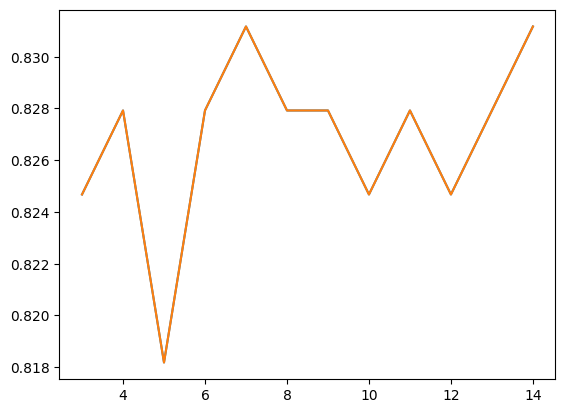

In [22]:
def simple_my_logistic_regression():
    m = MyLogisticRegression()
    m.fit(X_train_scaled, y_train)
    y_pred = m.predict(X_test_scaled)
    y_pred_train = m.predict(X_train_scaled)
    print("Accuracy ", accuracy_score(y_test, y_pred), accuracy_score(y_train, y_pred_train))

def my_logistic_regression_using_cross_val_and_tuning_hp():
    # tuning hyperparameters
    grid={"C":np.logspace(-3,3,7), "regularization":["l2", None]}
    searcher=GridSearchCV(MyLogisticRegression(), grid, scoring='accuracy', cv=7, error_score='raise')
    searcher.fit(X_train_scaled,y_train)
    # creating model
    best_C = searcher.best_params_["C"]
    best_penalty = searcher.best_params_["regularization"]
    print("Best C = ", best_C)
    print("Best regularization = ", best_penalty)
    model = MyLogisticRegression(C=best_C, regularization=best_penalty)
    # calculating accuracy
    (accuracy, number_of_folds) = classification_using_cross_val(model)
    print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))
    return accuracy

simple_my_logistic_regression()
classification_using_cross_val(MyLogisticRegression())
acc = my_logistic_regression_using_cross_val_and_tuning_hp()
accuracies['My Logistic Regression'] = acc

## K-Nearest Neighbour (KNN) Classification

Test Accuracy without repeated k-Fold Cross-Validation 0.8442
Test accuracy achieved with repeated 5 -Fold Cross-Validation: 0.873
Best n neighbors =  7
Best penalty =  distance
Best metric =  manhattan
Test accuracy achieved with repeated 3 -Fold Cross-Validation: 0.990
Test accuracy achieved with repeated 3 -Fold Cross-Validation && tuned hyperparams: 0.990


0.9902597402597403

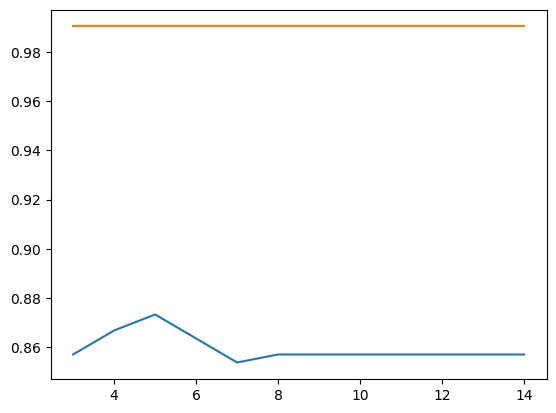

In [23]:
from sklearn.neighbors import KNeighborsClassifier

def knn_using_cross_val_and_tuning_hp():
    # tuning hyperparameters
    n_neighbors = range(1, 21, 2)
    weights = ['uniform', 'distance']
    metric = ['euclidean', 'manhattan', 'minkowski']
    # define grid search
    grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
    searcher=GridSearchCV(KNeighborsClassifier(), grid, scoring='accuracy', cv=10)
    searcher.fit(X_train_scaled,y_train)
    # creating model
    best_neighbors = searcher.best_params_['n_neighbors']
    best_weights = searcher.best_params_['weights']
    best_metric = searcher.best_params_['metric']
    print("Best n neighbors = ", best_neighbors)
    print("Best penalty = ", best_weights)
    print("Best metric = ", best_metric)
    model = KNeighborsClassifier(n_neighbors=best_neighbors, weights=best_weights, metric=best_metric)
    # calculating accuracy
    (accuracy, number_of_folds) = classification_using_cross_val(model)
    print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))
    return accuracy

knn = KNeighborsClassifier()
simple_classification(knn)
classification_using_cross_val(knn)
knn_using_cross_val_and_tuning_hp()

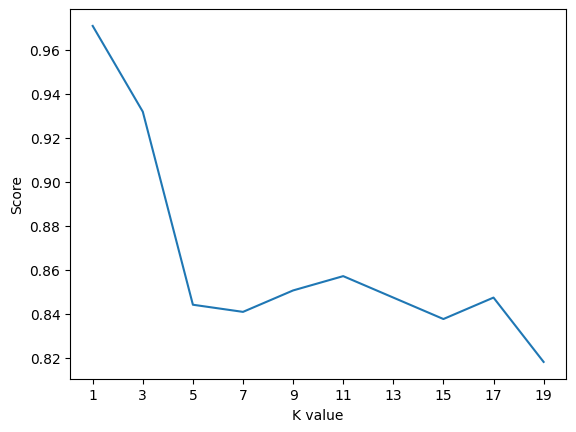

Maximum KNN Score is 0.9708


In [24]:
scoreList = []
for i in range(1, 20, 2):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train_scaled, y_train)
    scoreList.append(knn2.score(X_test_scaled, y_test))
    
plt.plot(range(1, 20, 2), scoreList)
plt.xticks(np.arange(1, 20, 2))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.4f}".format(acc))

### Реализованный knn

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import euclidean_distances

def most_common(lst):
    return max(set(lst), key=lst.count)

def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

class MyKNeighborsClassifier:
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))
    
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        return accuracy
    
    def set_params(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
        return self
        
    def get_params(self, deep=False):
        params = dict()
        params['k'] = self.k
        params['dist_metric'] = self.dist_metric
        return params
    

Test Accuracy without repeated k-Fold Cross-Validation 0.8442
Test accuracy achieved with repeated 5 -Fold Cross-Validation: 0.873
Best n neighbors =  1
Test accuracy achieved with repeated 11 -Fold Cross-Validation: 0.974
Test accuracy achieved with repeated 11 -Fold Cross-Validation && tuned hyperparams: 0.974


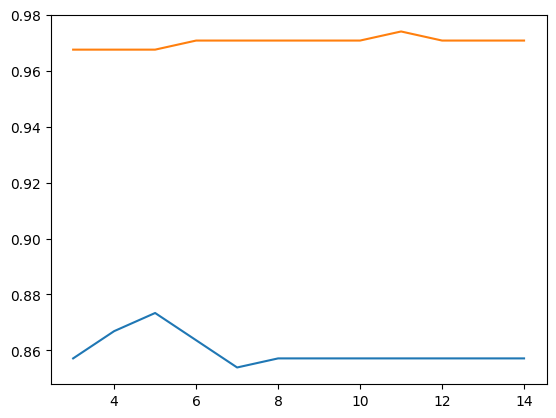

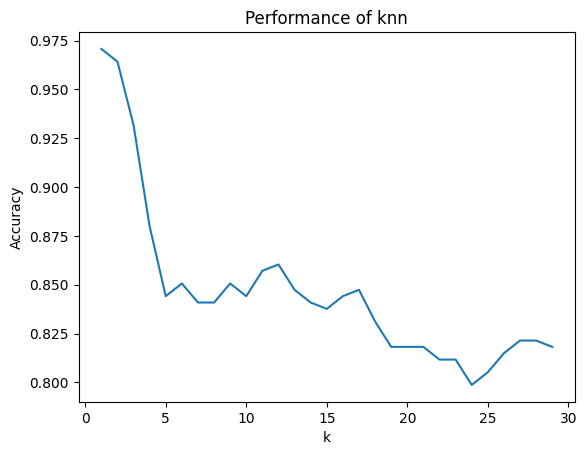

In [26]:
def knn_using_cross_val_and_tuning_hp():
    # tuning hyperparameters
    k = range(1, 21, 2)
    # define grid search
    grid = dict(k=k)
    searcher=GridSearchCV(MyKNeighborsClassifier(), grid, scoring='accuracy', cv=10)
    searcher.fit(X_train_scaled,y_train)
    # creating model
    best_neighbors = searcher.best_params_['k']
    print("Best n neighbors = ", best_neighbors)
    model = MyKNeighborsClassifier(k=best_neighbors)
    # calculating accuracy
    (accuracy, number_of_folds) = classification_using_cross_val(model)
    print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))
    return accuracy

myknn = MyKNeighborsClassifier()
simple_classification(myknn)
classification_using_cross_val(myknn)
knn_using_cross_val_and_tuning_hp()

knn_accuracies = []
ks = range(1, 30)
for my_k in ks:
    knn = MyKNeighborsClassifier(k=my_k)
    knn.fit(X_train_scaled, y_train)
    accuracy = knn.evaluate(X_test_scaled, y_test)
    accuracy_train = knn.evaluate(X_train_scaled, y_train)
    knn_accuracies.append(accuracy)
fig, ax = plt.subplots()
ax.plot(ks, knn_accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

## Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

def svm_using_cross_val_and_tuning_hp():
    # define model and parameters
    model = SVC()
    kernel = ['poly', 'rbf', 'sigmoid']
    C = [50, 10, 1.0, 0.1, 0.01]
    gamma = ['scale']
    # define grid search
    grid = dict(kernel=kernel,C=C,gamma=gamma)
    searcher=GridSearchCV(SVC(random_state=12), grid, scoring='accuracy', cv=10)
    searcher.fit(X_train_scaled,y_train)
    # calculating accuracy
    (accuracy, number_of_folds) = classification_using_cross_val(searcher)
    print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))
    return accuracy
    

svm = SVC(random_state = 12)
simple_classification(svm)
classification_using_cross_val(svm)
svm_using_cross_val_and_tuning_hp()

Test Accuracy without repeated k-Fold Cross-Validation 0.8961
Test accuracy achieved with repeated 13 -Fold Cross-Validation: 0.909


## Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB

def nb_using_cross_val_and_tuning_hp():
    grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
    }
    searcher=GridSearchCV(GaussianNB(), grid, scoring='accuracy', cv=10)
    searcher.fit(X_train_scaled,y_train)
    # calculating accuracy
    (accuracy, number_of_folds) = classification_using_cross_val(searcher)
    print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))
    return accuracy
    
nb = GaussianNB()
simple_classification(nb)
classification_using_cross_val(nb)
nb_using_cross_val_and_tuning_hp()


## Decision Tree Algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def dtc_using_cross_val_and_tuning_hp():
    grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
    }
    searcher=GridSearchCV(DecisionTreeClassifier(), grid, scoring='accuracy', cv=10)
    searcher.fit(X_train_scaled,y_train)
    # calculating accuracy
    (accuracy, number_of_folds) = classification_using_cross_val(searcher)
    print('Test accuracy achieved with repeated %d -Fold Cross-Validation && tuned hyperparams: %.3f' % (number_of_folds, accuracy))
    return accuracy

dtc = DecisionTreeClassifier()
simple_classification(dtc)
classification_using_cross_val(dtc)
dtc_using_cross_val_and_tuning_hp()

In [ ]:
from sklearn import tree

plt.figure(figsize=(32, 32))
tree.plot_tree(dtc, feature_names=df.columns,fontsize=10);

## Comparing Models

In [ ]:
colors = ["purple", "green", "orange", "magenta", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

## Confusion Matrix

In [ ]:
# Predicted values
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_head_lr = lr.predict(X_test_scaled)
knn3 = KNeighborsClassifier(n_neighbors = 1)
knn3.fit(X_train_scaled, y_train)
y_head_knn = knn3.predict(X_test_scaled)
y_head_svm = svm.predict(X_test_scaled)
y_head_nb = nb.predict(X_test_scaled)
y_head_dtc = dtc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)

In [ ]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

Для более честного сравнения необходимо подбирать гиперпараметры для каждой модели отдельно и сравнивать их лучшие варианты. Кроме того, вместо одного случайного разбиения на Test и Train необходимо использовать кросс-валидацию.